In [467]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn to get cooler plots 
from matplotlib.colors import LinearSegmentedColormap #some custom colours for later

%matplotlib inline

#dataframe Setup

path = "Data/DataAmongKikiData.csv" 

answers = pd.read_csv(path)

type(answers)

pandas.core.frame.DataFrame

In [468]:
answers.head()

,birthorder,invention,lifemovie,holiday,dreams,era,cloud,food,music
0,Youngest,Technology,Drama,Nature,no,singularity,No,Salty,beat
1,Oldest,Entertainment,Comedy,Nature,Sometimes,now,No,Spicy,melody
2,Oldest,Health,Comedy,Activity,Yes,singularity,Yes,Umami,BASS
3,Oldest,Technology,Comedy,Nature,Sometimes,now,No,Umami,beat
4,Oldest,Technology,Comedy,City,Sometimes,now,No,Umami,beat


After messing around with my data in python I cleaned up the csv file again to make it look more professional. (using titlecase + cutting text)

The next code section (setting my defaults) happened at the end as I had too much code and wanted to streamiline the process.

In [469]:
#_________________________________________________________________FORMATTING/AESTHETICS ✨ ______________________________________________________________

#changing the font, style and colours of the plots (using rcParams) to make it purdy :)

plt.rcParams['figure.figsize'] = (10, 6)

# Pastel purple color palette:

pastel_purples = ['#cabbe9', '#d6bcfa', '#e6e6fa', '#f3e9f7', '#e9e7fd', '#cec8ef', '#b9b4d7']


# Titles:

plt.rcParams['axes.titlepad'] = 5  
plt.rcParams['axes.titlecolor'] = 'black'  
plt.rcParams['axes.titleweight'] = 'bold'  
plt.rcParams['axes.titlelocation'] = 'center'  


# Font:

plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.size'] = 12  


#Axes:

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.titlepad'] = 20 # I went back and addded some padding to the titles as text was being obscured :(


For this task I was most interested in knowing the birth order of the cohort and how this may correlate with musical and sensory preferences

Text(0.5, 1.0, 'Birth Order')

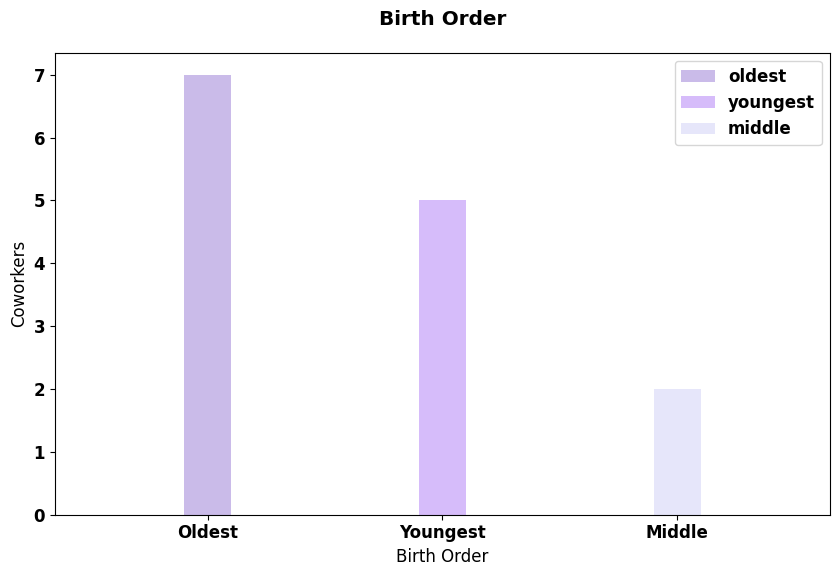

In [497]:
# Birth orders (grouping)

birthorders = answers.groupby('birthorder')

oldest_children = birthorders.get_group('Oldest')
middle_children = birthorders.get_group('Middle')
youngest_children = birthorders.get_group('Youngest')

#only_child = birthorders.get_group('Only Child')---> No only children


plt.hist(oldest_children.birthorder, bins=5, label='oldest', color=pastel_purples[0])
plt.hist(youngest_children.birthorder, bins=5, label='youngest', color=pastel_purples[1])
plt.hist(middle_children.birthorder, bins=5, label='middle', color=pastel_purples[2])

#plt.hist(only_child.birthorder, bins=5, label='middle', color=pastel_purples[2]) = N/A

plt.legend()

plt.xlabel('Birth Order')
plt.ylabel('Coworkers')
plt.title('Birth Order')

#plt.grid(True) #adding gridlines to imporve readability

It appears first-borns are most prevalent in the cohort and everyone has a sibling!

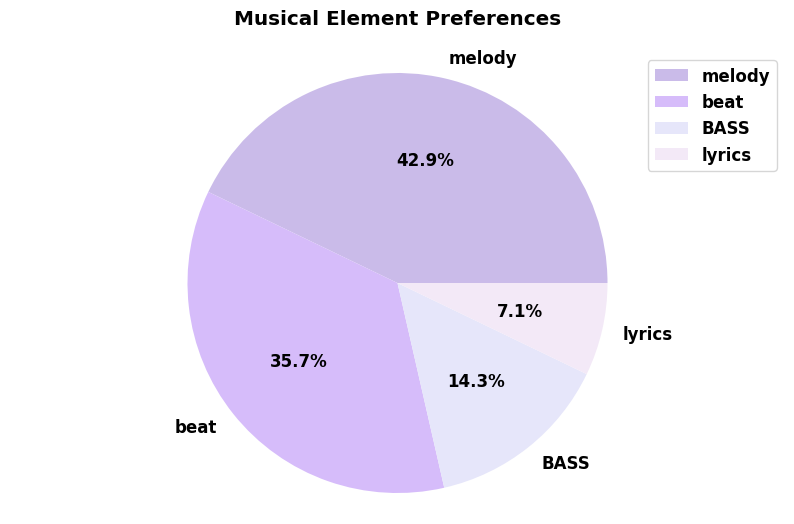

In [475]:
# Music preferences pie chart 

music_counts = answers['music'].value_counts()

plt.pie(music_counts, labels=music_counts.index, autopct='%1.1f%%', colors=pastel_purples) #adding percentages

plt.axis('equal')  #nice circles

plt.title('Musical Element Preferences')

plt.legend()
plt.show()


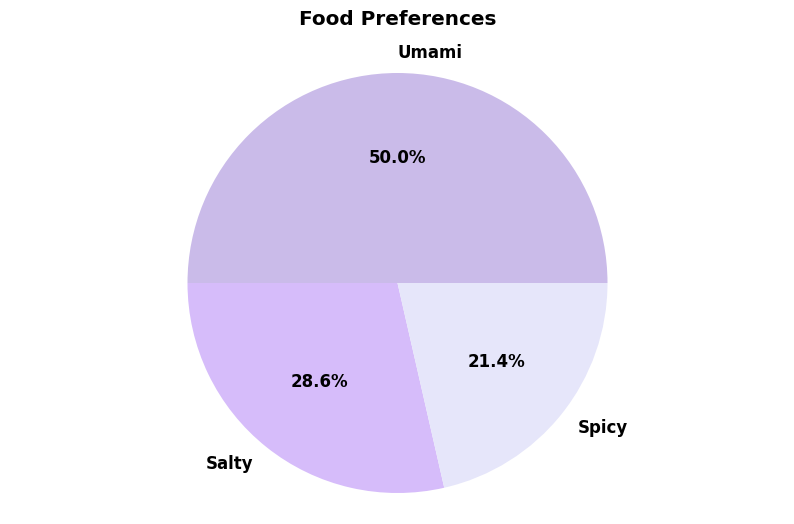

In [472]:
# Food preferences pie chart

food_counts = answers['food'].value_counts()
plt.pie(food_counts, labels=food_counts.index, autopct='%1.1f%%', colors=pastel_purples)
plt.title('Food Preferences')

plt.axis('equal')

plt.show()

General Trend = Oldest with a penchant for Melody and Umami flavors

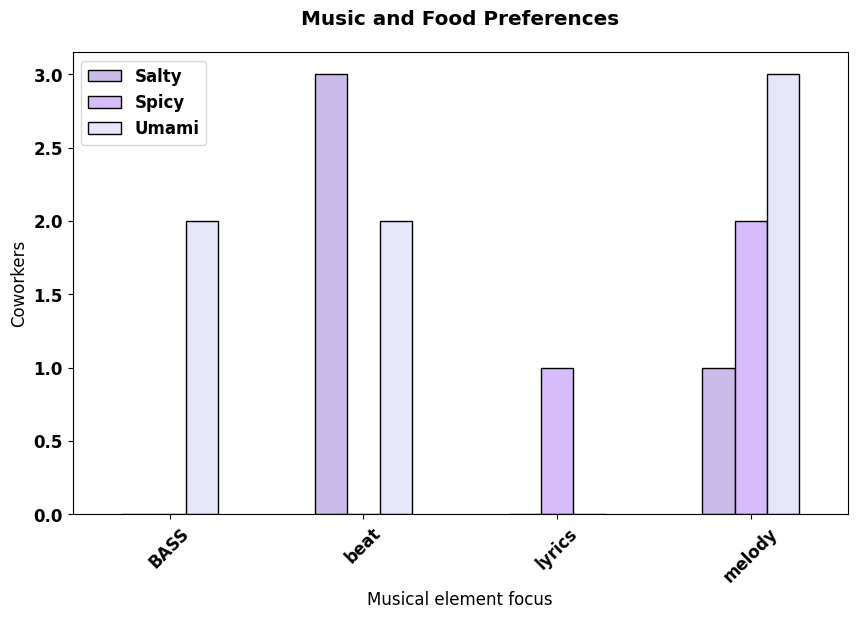

In [501]:
#Music x food bar chart using crosstabulation

food_music_ct = pd.crosstab(answers['music'], answers['food'])

food_music_ct.plot(kind='bar', figsize=(10, 6), edgecolor='black', color=pastel_purples)

plt.xlabel('Musical element focus')
plt.ylabel('Coworkers')
plt.title('Music and Food Preferences')

plt.xticks(rotation=45) #trying out text rotations

plt.legend()

plt.show()


Melody = Umami; harmonious complexity

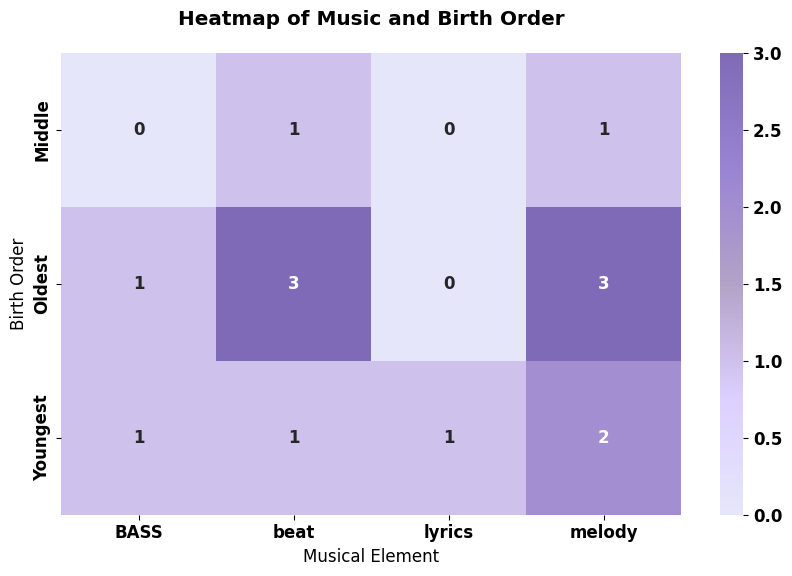

In [508]:
# Music x birthorder heatmap

music_birth_ct = pd.crosstab(answers['birthorder'], answers['music'])

# Purple color map

colors = ["#e6e6fa", "#dcd0ff", "#b3a2c7", "#9984d4", "#7f6ab7"]  
pastel_purple_cmap = LinearSegmentedColormap.from_list("pastel_purple", colors)

# Heatmap with custom pastel purples

sns.heatmap(music_birth_ct, annot=True, cmap=pastel_purple_cmap)
plt.xlabel('Musical Element')
plt.ylabel('Birth Order')

plt.title('Heatmap of Music and Birth Order')


plt.show()

Oldest = Beat; setting the tempo :D

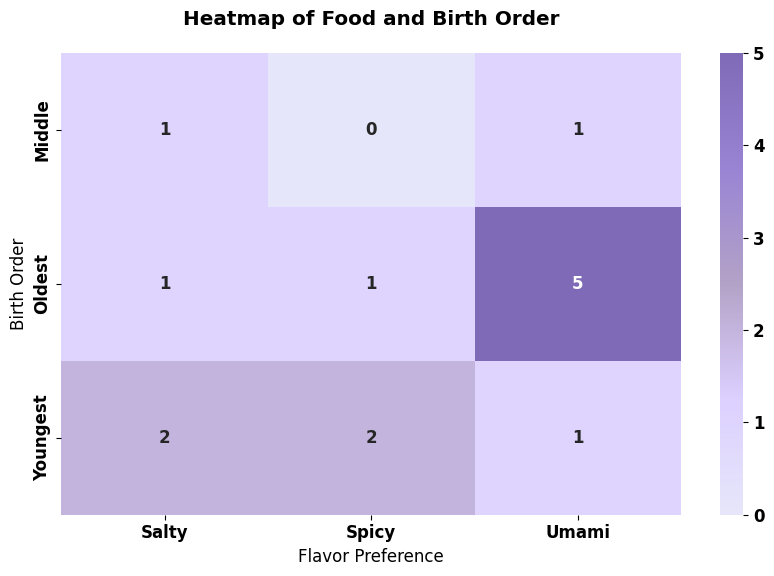

In [509]:
# Food x birthorder heatmap

music_birth_ct = pd.crosstab(answers['birthorder'], answers['food'])

# Purple color map

colors = ["#e6e6fa", "#dcd0ff", "#b3a2c7", "#9984d4", "#7f6ab7"]  
pastel_purple_cmap = LinearSegmentedColormap.from_list("pastel_purple", colors)

# Heatmap with custom pastel purples

sns.heatmap(music_birth_ct, annot=True, cmap=pastel_purple_cmap)
plt.xlabel('Flavor Preference')
plt.ylabel('Birth Order')

plt.title('Heatmap of Food and Birth Order')


plt.show()

Oldest = Umami; palate sophistication

Room for Improvement:

- More Data!
- A more granular exploration of subcategories.
- Find subtler insights within the data.